In [1]:
# group tasks: 
# 1-Find if there is a correlation between the price of the apps and the Content Rating (Teen, Everyone, Mature. etc). 
# 2-find the sentiment of all apps using np files and "afinn" lib 
# -    link for np files https://drive.google.com/drive/folders/1824UvFm8WBcOX_iiev0kNMrDu7aUARra?usp=share_link
# -    ask them to search about afinn lib 
# 3-for paid apps only list the top 5 highest and lowest sentiment numbers for afinn column with the name of the app and the app category 
# 4-what is the best category according to afinn sentiment values 
# guys i want you to use trello also please, so open a page there and organize your tasks on trello page and please invite me also to check the process with you here is my email : abdullah.jiroudi@develhope.co 
# and if you don't know the trello here is a tutorial of how to use it : 

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../week2/cleaned_playstore.csv", index_col=0)
ur_df = pd.read_csv('../week2/cleaned_playstore_reviews.csv', index_col=0)

In [29]:
pd.merge(df, ur_df, how = 'inner', on = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,3.300000e+07,1000000,Free,0.0,Everyone,It's...a coloring book ap. And I like adult co...,Positive,0.216667,0.573810
2,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,1.200000e+07,100000,Free,0.0,Everyone,After Vi Vi,Neutral,0.000000,0.000000
3,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,2.500000e+07,500000,Free,0.0,Everyone,Good luck getting pictures free. Everyday supp...,Positive,0.150000,0.720833
4,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.100000e+06,100000,Free,0.0,Everyone,This awesome app. Love it. Wish stickers thoug...,Positive,0.766667,0.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Four In A Line,GAME,3.8,22191,3.000000e+06,1000000,Free,0.0,Everyone,Its perfect intrusive adds! People give 4 star...,Positive,1.000000,0.766667
605,Hay Day,FAMILY,4.5,10053186,9.400000e+07,100000000,Free,0.0,Everyone,I wanting couple changes 1. I would like boat ...,Positive,0.091667,0.308333
606,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,9.700000e+06,50000000,Free,0.0,Everyone,This good editing sadly look back recording vi...,Negative,-0.043750,0.500000
607,Dumb Ways to Die 2: The Games,FAMILY,4.2,1671658,2.039287e+07,50000000,Free,0.0,Teen,"I thought exiting game, reason many hard obsta...",Positive,0.032576,0.531061


In [3]:
df['Content Rating'] = df['Content Rating'].astype('category')

In [4]:
df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [5]:
df = df[~(df['Content Rating'].isin(['Unrated', 'Adults only 18+']))]

## Nomality Assumption is not met?

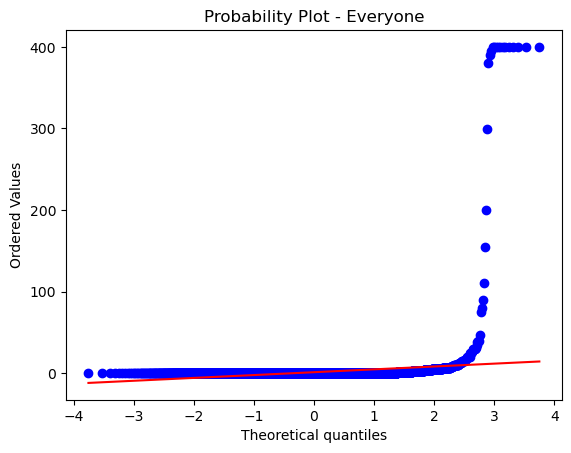

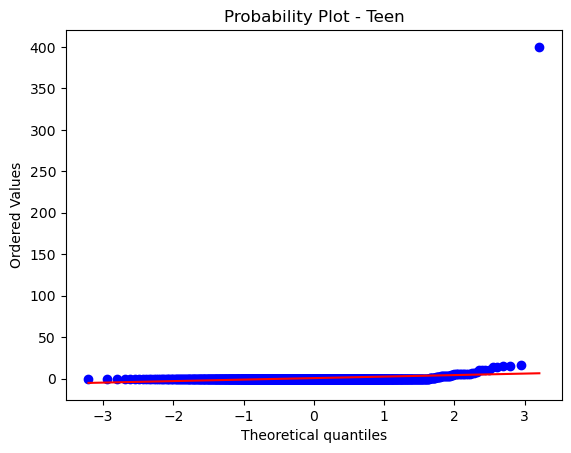

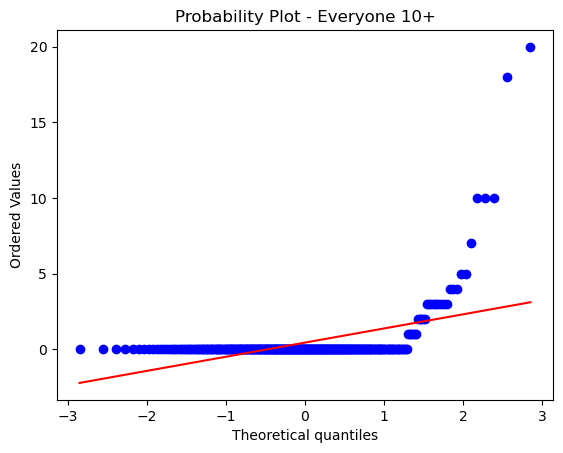

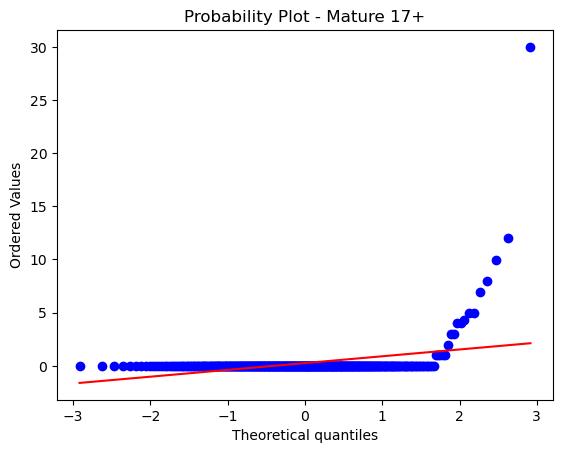

In [6]:
import numpy as np 
import scipy.stats as stats


unique_cat = df['Content Rating'].unique()
for cat in unique_cat:
    stats.probplot(df[df['Content Rating'] == cat]['Price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  cat)
    plt.show()

In [7]:
stats.kruskal(df[df['Content Rating'] == 'Everyone'].Price, df[df['Content Rating'] == 'Teen'].Price,
              df[df['Content Rating'] == 'Mature 17+'].Price, df[df['Content Rating'] == 'Everyone 10+'].Price)

KruskalResult(statistic=20.1704413807946, pvalue=0.0001564809810804139)

## Small P indicated medians are not equal

In [8]:
# 2
# !pip install afinn

In [9]:
ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
2,11st,Horrible ID verification,Negative,-1.000000,1.000000
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
...,...,...,...,...,...
636,Hotels Combined - Cheap deals,Totally unimpressed. We booking hotels Vietnam...,Negative,-0.083333,0.427778
637,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667
638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000
639,Hotstar,running,Neutral,0.000000,0.000000


In [10]:
p = list(pd.read_excel('p.xlsx', header = None)[0])
n = list(pd.read_excel('n.xlsx', header = None)[0])

In [11]:
import string
from afinn import Afinn

afinn = Afinn()

for index, row in ur_df.iterrows():
    # remove periods from the end of each sentence, lower and split
    
    sentence = row['Translated_Review'].translate(str.maketrans('', '', string.punctuation)).lower()
    words = sentence.split()
    p_count = 0
    n_count = 0
    
    for word in words:
        if word in p:
            p_count += 1
        elif word in n:
            n_count += 1
        else:
            continue

    ur_df.at[index, 'p_count'] = p_count
    ur_df.at[index, 'n_count'] = n_count
    
    ur_df.at[index, 'manual_score'] = p_count - n_count
    ur_df.at[index, 'afinn_score'] = afinn.score(sentence)

In [13]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,5.300000e+07,5000,Free,0.0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000e+06,100,Free,0.0,Everyone
9657,Parkinson Exercices FR,MEDICAL,4.2,3,9.500000e+06,1000,Free,0.0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,2.039287e+07,1000,Free,0.0,Mature 17+


In [14]:
# 3

afinn_df = ur_df.groupby('App').afinn_score.sum().reset_index()

In [22]:
df.loc[df.Type == 'Paid', ['App', 'Category']]

,App,Category
233,TurboScan: scan documents and receipts in PDF,BUSINESS
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS
372,Puffin Browser Pro,COMMUNICATION
406,"Moco+ - Chat, Meet People",DATING
407,Calculator,DATING
...,...,...
9556,FP VoiceBot,FAMILY
9580,Fast Tract Diet,HEALTH_AND_FITNESS
9601,Trine 2: Complete Story,GAME
9604,"sugar, sugar",FAMILY


In [24]:
df.loc[df.Type == 'Paid', ['App', 'Category']]

,App,Category
233,TurboScan: scan documents and receipts in PDF,BUSINESS
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS
372,Puffin Browser Pro,COMMUNICATION
406,"Moco+ - Chat, Meet People",DATING
407,Calculator,DATING
...,...,...
9556,FP VoiceBot,FAMILY
9580,Fast Tract Diet,HEALTH_AND_FITNESS
9601,Trine 2: Complete Story,GAME
9604,"sugar, sugar",FAMILY


In [25]:
afinn_df[['App', 'afinn_score']]

,App,afinn_score
0,10 Best Foods for You,13.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,3.0
2,11st,-3.0
3,1800 Contacts - Lens Store,4.0
4,1LINE – One Line with One Touch,-2.0
...,...,...
636,Hotels Combined - Cheap deals,-3.0
637,Hotels.com: Book Hotel Rooms & Find Vacation D...,-2.0
638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,-1.0
639,Hotstar,0.0


In [21]:
pd.merge(df.loc[df.Type == 'Paid', ['App', 'Category']], afinn_df[['App', 'afinn_score']], how = 'inner', on = 'App')

,App,Category,afinn_score
0,Farming Simulator 18,GAME,-3.0
1,Call of Duty:Black Ops Zombies,GAME,3.0
2,Essential Anatomy 3,MEDICAL,12.0
3,Diabetes & Diet Tracker,MEDICAL,-4.0
4,Golfshot Plus: Golf GPS,SPORTS,0.0
5,Beautiful Widgets Pro,PERSONALIZATION,6.0
6,HD Widgets,PERSONALIZATION,6.0
7,BIG Launcher,PERSONALIZATION,6.0


In [12]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,p_count,n_count,manual_score,afinn_score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,4.0,0.0,4.0,13.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000,1.0,0.0,1.0,3.0
2,11st,Horrible ID verification,Negative,-1.000000,1.000000,0.0,1.0,-1.0,-3.0
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000,2.0,1.0,1.0,4.0
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762,0.0,1.0,-1.0,-2.0
